### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

### Importing the csv file and exploring the dataset

In [5]:
#exploring dataset
data = pd.read_csv('AdSmartABdata.csv')

In [6]:
#shape of dataset
data.shape

(8077, 9)

In [7]:
#first 5 lines
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [8]:
#data types
data.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [9]:
#number of unique values
data.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [10]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### The experiment variable - which group the user belongs to - control or exposed.
The variable is nominal categorical in nature 

Control: users who have been shown a dummy ad

Exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand

In [11]:
#Value count of experiment column
data['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

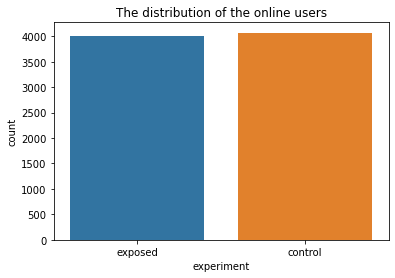

In [13]:
#plotting the variable
sns.countplot(x=data['experiment'], data=data)
plt.title('The distribution of the online users')
plt.savefig('user.png', dpi=300)
plt.show()

#### Observations
The two groups of users who were presented the BIO questionnaire are approximately equal with the exposed group (49.6%) and the control group (50.4%)

### The date variable - the date in YYYY-MM-DD format
The variable is ordinal categorical in nature 

The date range is between 03-07-2020 - 10-07-2020. 

In [10]:
#value counts of the column
data['date'].value_counts()

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

In [13]:
#converting date to datetime object 
data['date'] = data['date'].map(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

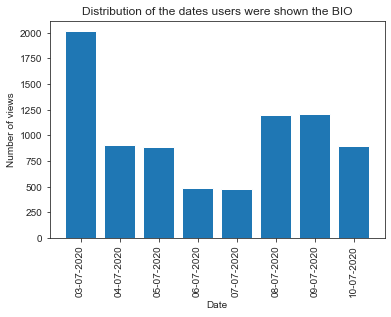

In [49]:
#plotting the views per date
ax = plt.gca()
xformatter = mdates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(xformatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
counts = data["date"].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of the dates users were shown the BIO')
plt.xlabel("Date")
plt.ylabel('Number of views')
plt.show()

#### Observations
The dates the users were presented the BIO questionnaire ranged between 03-07-2020 to 10-07-2020. It was most viewed on the 3rd of July,2020 with 2015 views(24.9%)and the least views was on the 7th of July,2020 with 480 views(5.94%)

### The hour variable - the hour of the day in HH format.
The variable is ordinal categorical in nature 

The hour ranges from 0:00hrs - 23:00hrs(Hours in a day)

In [27]:
data['hour'].value_counts()

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

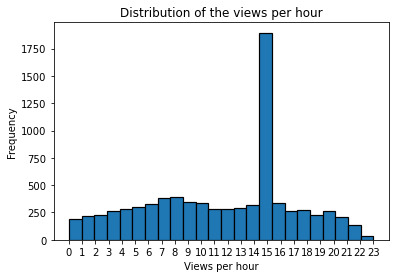

In [14]:
plt.hist(data['hour'], bins=24, histtype ='bar', edgecolor='black', linewidth=1.2)
plt.title('Distribution of the views per hour')
plt.xlabel('Views per hour')
plt.ylabel('Frequency')
plt.xticks(list(range(0,24)))
plt.savefig('hour.png', dpi=300)
plt.show()

#### Observations
The 15:00hrs(3:00pm)was the hour with the most views across the week with 1895 views within the hour. 23:00HRS(11:00pm) was the hour with the least views across the week with 31 views. 

### The device_make : the name of the type of device the user has

The variable is nominal categorical in nature
The variable has 270 unique values. 


In [50]:
data['device_make'].value_counts().head(10)

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Samsung SM-G930F       100
Samsung SM-G975F        97
Samsung SM-A202F        88
Samsung SM-A405FN       87
Samsung SM-J330FN       69
Name: device_make, dtype: int64

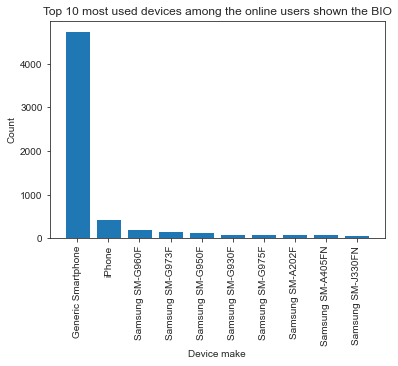

In [53]:
counts = data["device_make"].value_counts().head(10)
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.title('Top 10 most used devices among the online users shown the BIO')
plt.xlabel('Device make')
plt.ylabel('Count')
plt.show()

### The platform_os variable : the id of the OS the user has.

The variable is nominal categorical in nature


In [59]:
data['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

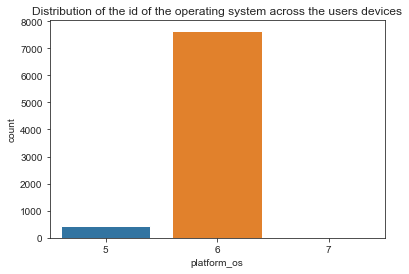

In [58]:
sns.countplot(x='platform_os', data=data)
plt.title('Distribution of the id of the operating system across the users devices')
plt.show()


#### Observations
The platform_os category 6 is the most used OS with 94.7% use across user devices. 

### The browser variable  : the name of the browser the user uses to see the BIO questionnaire.

The variable is nominal categorical in nature


In [60]:
data['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Firefox Mobile                   1
Android                          1
Puffin                           1
Name: browser, dtype: int64

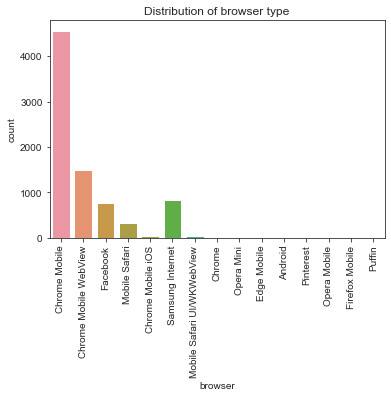

In [63]:
sns.countplot(x='browser',data=data)
plt.xticks(rotation=90)
plt.title('Distribution of browser type')
plt.show()

#### Observations
The Chrome Mobile browser is the most used browser to view the BIO questionnaire.56.4% of the users used it.  

### the yes variable 
The variable is ordinal categorical

1 if the user chooses the “Yes” radio button for the BIO questionnaire


In [64]:
data['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

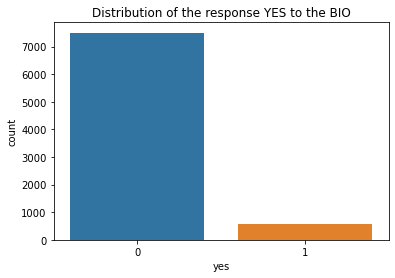

In [15]:
sns.countplot(x='yes', data=data)
plt.title('Distribution of the response YES to the BIO')
plt.savefig('yes.png', dpi=300)
plt.show()

#### Observations
Only 7.08%(572) of the viewers answered YES to the BIO questionnaire. 

### The no variable 
The variable is ordinal categorical

1 if the user chooses the “No” radio button for the BIO questionnaire

In [66]:
data['no'].value_counts()


0    7406
1     671
Name: no, dtype: int64

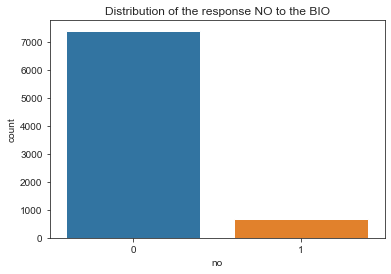

In [69]:
sns.countplot(x='no', data=data)
plt.title('Distribution of the response NO to the BIO')
plt.show()

#### Observations

Only 8.3%(671) of the viewers answered NO to the BIO questionnaire.


### Relationships between features